# Immporte das bibliotecas e constantes

In [ ]:
!pip install --user mplhep
import mplhep as hep 

from google.colab import drive
drive.mount('/content/drive')

import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from joblib import load

PATH = '/content/drive/MyDrive/Amostras_4Anomalos_Macedo/'
PATH_ = '/content/drive/MyDrive/Amostras_4Anomalos_Macedo_Eventos/'
PATH2 = '/content/drive/MyDrive/LGBM_Multiclass_ANOMALO_WWCEP_ Drecision_Tree/'
PATH_PLOT = '/content/drive/MyDrive/Ptos_Backgrond_Signal_ANOMALOS/'
raiz_s = 13000
plt.style.use([hep.style.ROOT, hep.style.firamath])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


# Abrindo os arquivos .h5
- Aplicando o corte na região de controle do Signal
- Corrigindo as colunas do Background


In [ ]:
# Corte na região de sinal e adicionado corte na Massa Invariante do W

def open_file_back( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 0

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)

        dset = df[df_cut]
        return dset


def open_file_dados( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        dset = df[df_cut]
        return dset



def open_file_signal( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 1

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        dset = df[df_cut]
        return dset






def open_file_SM( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 2

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        dset = df[df_cut]
        return dset






In [ ]:
Drell_Yan = open_file_back(PATH_ + 'DataSet_multiRP_DrellYan.h5')
QCD = open_file_back(PATH_ + 'DataSet_multiRP_QCD.h5')
Single_top = open_file_back(PATH_ + 'DataSet_multiRP_single_top.h5')
VV_Inclusivo = open_file_back(PATH_ + 'DataSet_multiRP_VV_inclusivo.h5')
W_Jets = open_file_back(PATH_ + 'DataSet_multiRP_WJets.h5')
TT_bar = open_file_back(PATH_ + 'DataSet_TTbar.h5')

data = open_file_dados(PATH_ + 'DataSet_dados_multiRP.h5')

A01 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO1_multiRP.h5' )
A02 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO2_multiRP.h5' )
A03 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO3_multiRP.h5' )
A04 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO4_multiRP.h5' )
A05 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO5_multiRP.h5' )
A06 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO6_multiRP.h5' )
A07 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO7_multiRP.h5' )
A08 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO8_multiRP.h5' )

SM = open_file_SM( PATH_ + 'output-SM_multiRP.h5' )

In [ ]:
columns_ = [ b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep',b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta',
                b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                b'muon_pt',          b'muon_eta',       b'ExtraTracks',
               b'PUWeight',        b'W_rapidity',              b'btag',
                b'xi1',               b'xi2',b'ismultirp1',        b'ismultirp2',
                b'Norm',
                  b'weight',              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww', b'label']


columns_data = [ b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep',b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta',
                b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                b'muon_pt',          b'muon_eta',       b'ExtraTracks',
               b'PUWeight',        b'W_rapidity',              b'btag',
                b'xi1',               b'xi2',b'ismultirp1',        b'ismultirp2',
                              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww']




DrellYan = pd.DataFrame( np.array(Drell_Yan),columns=columns_ )
QCD_ = pd.DataFrame( np.array(QCD),columns=columns_ )
SingleTop = pd.DataFrame( np.array(Single_top),columns=columns_ )
VVInclusivo = pd.DataFrame( np.array(VV_Inclusivo),columns=columns_ )
Wjets = pd.DataFrame( np.array(W_Jets),columns=columns_ )
TTbar = pd.DataFrame( np.array(TT_bar),columns=columns_ )

data_set_dados_multirp = pd.DataFrame( np.array(data),columns=columns_data )

concat_back = pd.concat([DrellYan, QCD_, SingleTop, VVInclusivo, Wjets, TTbar])

concat_back[b'label'] = 0

# Preparando dados de teste e treino da Decision Tree

In [ ]:
DataSet_ANML01 = pd.concat([A01, concat_back, SM])
DataSet_ANML02 = pd.concat([A02, concat_back, SM])
DataSet_ANML03 = pd.concat([A03, concat_back, SM])
DataSet_ANML04 = pd.concat([A04, concat_back, SM])
DataSet_ANML05 = pd.concat([A05, concat_back, SM])
DataSet_ANML06 = pd.concat([A06, concat_back, SM])
DataSet_ANML07 = pd.concat([A07, concat_back, SM])
DataSet_ANML08 = pd.concat([A08, concat_back, SM])

In [ ]:
from sklearn.model_selection import train_test_split

test_size_ = 0.5

DataSet_Train1_, DataSet_Test1_ = train_test_split( DataSet_ANML01, test_size = test_size_, random_state=42, stratify=DataSet_ANML01[b'label'] )
DataSet_Train2_, DataSet_Test2_ = train_test_split( DataSet_ANML02, test_size = test_size_, random_state=42, stratify=DataSet_ANML02[b'label'] )
DataSet_Train3_, DataSet_Test3_ = train_test_split( DataSet_ANML03, test_size = test_size_, random_state=42, stratify=DataSet_ANML03[b'label'] )
DataSet_Train4_, DataSet_Test4_ = train_test_split( DataSet_ANML04, test_size = test_size_, random_state=42, stratify=DataSet_ANML04[b'label'] )
DataSet_Train5_, DataSet_Test5_ = train_test_split( DataSet_ANML05, test_size = test_size_, random_state=42, stratify=DataSet_ANML05[b'label'] )
DataSet_Train6_, DataSet_Test6_ = train_test_split( DataSet_ANML06, test_size = test_size_, random_state=42, stratify=DataSet_ANML06[b'label'] )
DataSet_Train7_, DataSet_Test7_ = train_test_split( DataSet_ANML07, test_size = test_size_, random_state=42, stratify=DataSet_ANML07[b'label'] )
DataSet_Train8_, DataSet_Test8_ = train_test_split( DataSet_ANML08, test_size = test_size_, random_state=42, stratify=DataSet_ANML08[b'label'] )

In [ ]:
label_train_ANML1 = DataSet_Train1_[b'label']
label_test_ANML1 = DataSet_Test1_[b'label']

label_train_ANML2 = DataSet_Train2_[b'label']
label_test_ANML2 = DataSet_Test2_[b'label']

label_train_ANML3 = DataSet_Train3_[b'label']
label_test_ANML3 = DataSet_Test3_[b'label']

label_train_ANML4 = DataSet_Train4_[b'label']
label_test_ANML4 = DataSet_Test4_[b'label']

label_train_ANML5 = DataSet_Train5_[b'label']
label_test_ANML5 = DataSet_Test5_[b'label']

label_train_ANML6 = DataSet_Train6_[b'label']
label_test_ANML6 = DataSet_Test6_[b'label']

label_train_ANML7 = DataSet_Train7_[b'label']
label_test_ANML7 = DataSet_Test7_[b'label']

label_train_ANML8 = DataSet_Train8_[b'label']
label_test_ANML8 = DataSet_Test8_[b'label']

In [ ]:
colunas = [b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep', b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta', b'jetAK8_prunedMass', b'jetAK8_tau21', b'METPt', b'muon_pt', b'muon_eta', b'ExtraTracks', b'W_rapidity', b'xi1', b'xi2',b'Mpps', b'Ypps', b'Mww/Mpps', b'Ypps-Yww']

In [ ]:
DataSet_Train1 = DataSet_Train1_[colunas]
DataSet_Test1 = DataSet_Test1_[colunas]

DataSet_Train2 = DataSet_Train2_[colunas]
DataSet_Test2 = DataSet_Test2_[colunas]

DataSet_Train3 = DataSet_Train3_[colunas]
DataSet_Test3 = DataSet_Test3_[colunas]

DataSet_Train4 = DataSet_Train4_[colunas]
DataSet_Test4 = DataSet_Test4_[colunas]

DataSet_Train5 = DataSet_Train5_[colunas]
DataSet_Test5 = DataSet_Test5_[colunas]

DataSet_Train6 = DataSet_Train6_[colunas]
DataSet_Test6 = DataSet_Test6_[colunas]

DataSet_Train7 = DataSet_Train7_[colunas]
DataSet_Test7 = DataSet_Test7_[colunas]

DataSet_Train8 = DataSet_Train8_[colunas]
DataSet_Test8 = DataSet_Test8_[colunas]

In [ ]:
DataSet_Test1_weight_backg = DataSet_Test1_[DataSet_Test1_[ b'label']==0][b'weight']
DataSet_Test1_weight_signal = DataSet_Test1_[DataSet_Test1_[ b'label']==1][b'weight']
DataSet_Test1_weight_SM = DataSet_Test1_[DataSet_Test1_[ b'label']==2][b'weight']
DataSet_Test1_weight = DataSet_Test1_[b'weight']


DataSet_Test8_weight_backg = DataSet_Test8_[DataSet_Test8_[ b'label']==0][b'weight']
DataSet_Test8_weight_signal = DataSet_Test8_[DataSet_Test8_[ b'label']==1][b'weight']
DataSet_Test8_weight_SM = DataSet_Test8_[DataSet_Test8_[ b'label']==2][b'weight']
DataSet_Test8_weight = DataSet_Test8_[b'weight']


DataSet_Test7_weight_backg = DataSet_Test7_[DataSet_Test7_[ b'label']==0][b'weight']
DataSet_Test7_weight_signal = DataSet_Test7_[DataSet_Test7_[ b'label']==1][b'weight']
DataSet_Test7_weight_SM = DataSet_Test7_[DataSet_Test7_[ b'label']==2][b'weight']
DataSet_Test7_weight = DataSet_Test7_[b'weight']


DataSet_Test6_weight_backg = DataSet_Test6_[DataSet_Test6_[ b'label']==0][b'weight']
DataSet_Test6_weight_signal = DataSet_Test6_[DataSet_Test6_[ b'label']==1][b'weight']
DataSet_Test6_weight_SM = DataSet_Test6_[DataSet_Test6_[ b'label']==2][b'weight']
DataSet_Test6_weight = DataSet_Test6_[b'weight']


DataSet_Test5_weight_backg = DataSet_Test5_[DataSet_Test5_[ b'label']==0][b'weight']
DataSet_Test5_weight_signal = DataSet_Test5_[DataSet_Test5_[ b'label']==1][b'weight']
DataSet_Test5_weight_SM = DataSet_Test5_[DataSet_Test5_[ b'label']==2][b'weight']
DataSet_Test5_weight = DataSet_Test5_[b'weight']


DataSet_Test2_weight_backg = DataSet_Test2_[DataSet_Test2_[ b'label']==0][b'weight']
DataSet_Test2_weight_signal = DataSet_Test2_[DataSet_Test2_[ b'label']==1][b'weight']
DataSet_Test2_weight_SM = DataSet_Test2_[DataSet_Test2_[ b'label']==2][b'weight']
DataSet_Test2_weight = DataSet_Test2_[b'weight']


DataSet_Test3_weight_backg = DataSet_Test3_[DataSet_Test3_[ b'label']==0][b'weight']
DataSet_Test3_weight_signal = DataSet_Test3_[DataSet_Test3_[ b'label']==1][b'weight']
DataSet_Test3_weight_SM = DataSet_Test3_[DataSet_Test3_[ b'label']==2][b'weight']
DataSet_Test3_weight = DataSet_Test3_[b'weight']


DataSet_Test4_weight_backg = DataSet_Test4_[DataSet_Test4_[ b'label']==0][b'weight']
DataSet_Test4_weight_signal = DataSet_Test4_[DataSet_Test4_[ b'label']==1][b'weight']
DataSet_Test4_weight_SM = DataSet_Test4_[DataSet_Test4_[ b'label']==2][b'weight']
DataSet_Test4_weight = DataSet_Test4_[b'weight']

# Abrindo arquivos já treinados - Voting Classifier

In [ ]:
search_result1_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO1_DataDriven.joblib')
search_result2_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO2_DataDriven.joblib')
search_result3_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO3_DataDriven.joblib')
search_result4_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO4_DataDriven.joblib')
search_result5_Multiclass_logloss_scale_pos_weight = load(PATH  + 'VotingClassifier_Soft_Multiclass_ANOMALO5**_DataDriven.joblib')
search_result6_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO6_DataDriven.joblib')
search_result7_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO7_DataDriven.joblib')
search_result8_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO8_DataDriven.joblib')

In [ ]:
from sklearn.metrics import make_scorer,fbeta_score,precision_score,recall_score,accuracy_score,log_loss,roc_auc_score,classification_report,f1_score,confusion_matrix,roc_curve,precision_recall_curve,average_precision_score

# ROC CURVE

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


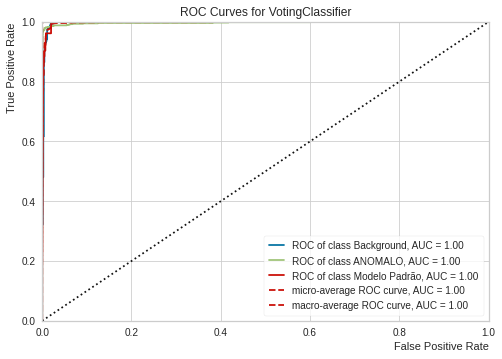

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc1 = roc_auc(search_result1_Multiclass_logloss_scale_pos_weight, DataSet_Train1, label_train_ANML1, DataSet_Test1, label_test_ANML1, classes=['Background', 'ANOMALO', 'Modelo Padrão'])
roc1.show()
#roc1.savefig(PATH_PLOT + 'ROC_CORVE1.png', dpi = 300)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


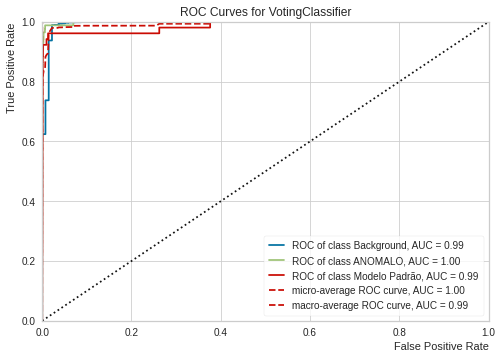

In [ ]:
roc2 = roc_auc(search_result2_Multiclass_logloss_scale_pos_weight, DataSet_Train2, label_train_ANML2, DataSet_Test2, label_test_ANML2, classes=['Background', 'ANOMALO', 'Modelo Padrão'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


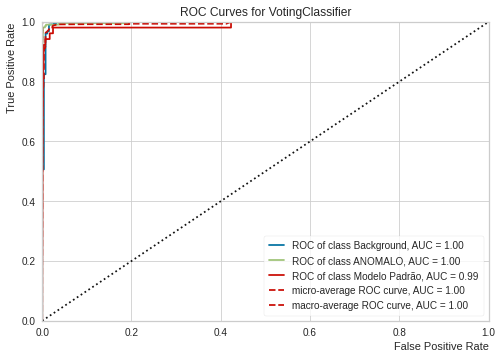

In [ ]:
roc3 = roc_auc(search_result3_Multiclass_logloss_scale_pos_weight, DataSet_Train3, label_train_ANML3, DataSet_Test3, label_test_ANML3, classes=['Background', 'ANOMALO', 'Modelo Padrão'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


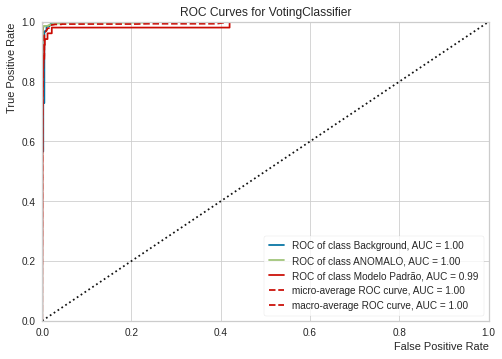

In [ ]:
roc4 = roc_auc(search_result4_Multiclass_logloss_scale_pos_weight, DataSet_Train4, label_train_ANML4, DataSet_Test4, label_test_ANML4, classes=['Background', 'ANOMALO', 'Modelo Padrão'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


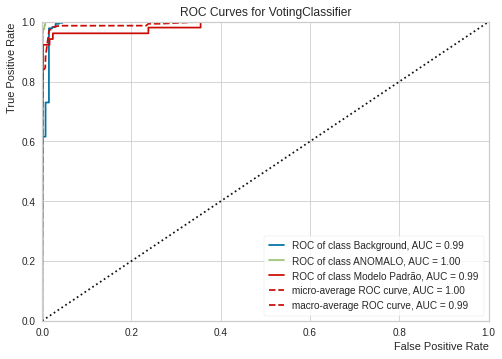

In [ ]:
roc5 = roc_auc(search_result5_Multiclass_logloss_scale_pos_weight, DataSet_Train5, label_train_ANML5, DataSet_Test5, label_test_ANML5, classes=['Background', 'ANOMALO', 'Modelo Padrão'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


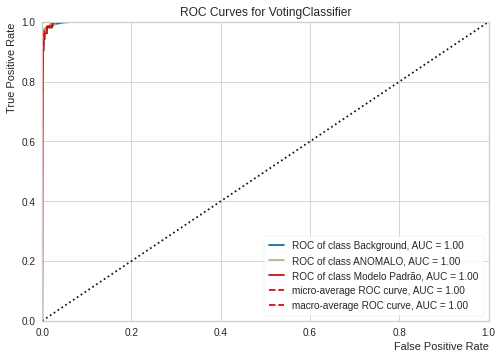

In [ ]:
roc6 = roc_auc(search_result6_Multiclass_logloss_scale_pos_weight, DataSet_Train6, label_train_ANML6, DataSet_Test6, label_test_ANML6, classes=['Background', 'ANOMALO', 'Modelo Padrão'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


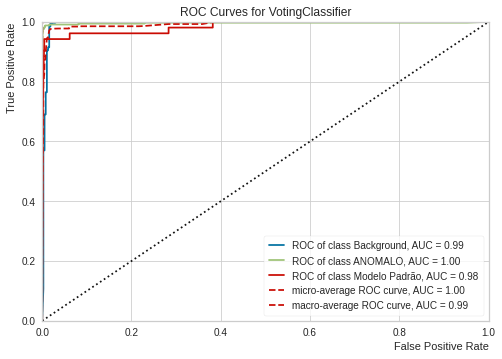

In [ ]:
roc7 = roc_auc(search_result7_Multiclass_logloss_scale_pos_weight, DataSet_Train7, label_train_ANML7, DataSet_Test7, label_test_ANML7, classes=['Background', 'ANOMALO', 'Modelo Padrão'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


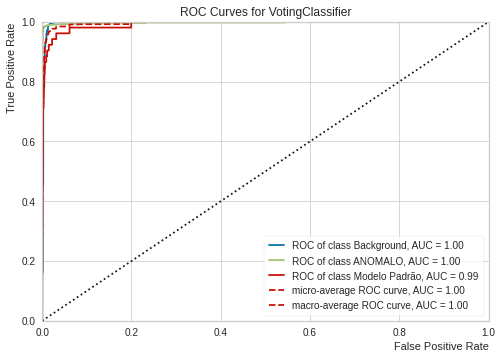

In [ ]:
roc8 = roc_auc(search_result8_Multiclass_logloss_scale_pos_weight, DataSet_Train8, label_train_ANML8, DataSet_Test8, label_test_ANML8, classes=['Background', 'ANOMALO', 'Modelo Padrão'])
